## Day 12: Anomaly Detection

### Problem Statement
In financial datasets, anomalous observations often represent fraudulent or risky behavior.

The goal is to identify rare and unusual data points without relying heavily on labeled data.

### Why Anomaly Detection?
- Fraud cases are rare
- Labels are expensive or unavailable
- Traditional classifiers may fail


In [2]:
import pandas as pd

df = pd.read_csv('financial_anomaly_data.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

First 5 rows of the DataFrame:
          Timestamp TransactionID AccountID    Amount   Merchant  \
0  01-01-2023 08:00       TXN1127      ACC4  95071.92  MerchantH   
1  01-01-2023 08:01       TXN1639     ACC10  15607.89  MerchantH   
2  01-01-2023 08:02        TXN872      ACC8  65092.34  MerchantE   
3  01-01-2023 08:03       TXN1438      ACC6     87.87  MerchantE   
4  01-01-2023 08:04       TXN1338      ACC6    716.56  MerchantI   

  TransactionType     Location  
0        Purchase        Tokyo  
1        Purchase       London  
2      Withdrawal       London  
3        Purchase       London  
4        Purchase  Los Angeles  

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 

## Preparig  Data for Anomaly Detection
This involves handling missing values, converting the 'Timestamp' column to datetime objects, extracting new features ('Hour', 'DayOfWeek') from 'Timestamp', applying one-hot encoding to specified categorical columns, dropping the original 'Timestamp' and 'TransactionID' columns, and finally scaling all numerical features using StandardScaler.

These steps are logically connected and best performed in a single code block to ensure data consistency and efficiency.



In [3]:
from sklearn.preprocessing import StandardScaler

# 1. Remove rows with any missing values
initial_rows = len(df)
df.dropna(inplace=True)
print(f"Dropped {initial_rows - len(df)} rows with missing values. Remaining rows: {len(df)}")

# 2. Convert the 'Timestamp' column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
print("Timestamp column converted to datetime.")

# 3. Extract 'Hour' and 'DayOfWeek' from the 'Timestamp' column
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
print("Extracted 'Hour' and 'DayOfWeek' from Timestamp.")

# Drop the original 'Timestamp' column as its information is now in 'Hour' and 'DayOfWeek'
df.drop('Timestamp', axis=1, inplace=True)
print("Original 'Timestamp' column dropped.")

# 4. Identify categorical columns for one-hot encoding
categorical_cols = ['TransactionType', 'Location', 'Merchant', 'AccountID']
print(f"Categorical columns identified for one-hot encoding: {categorical_cols}")

# 5. Apply one-hot encoding to the identified categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
print("One-hot encoding applied to categorical columns.")

# 6. Drop the 'TransactionID' column
df.drop('TransactionID', axis=1, inplace=True)
print("'TransactionID' column dropped.")

# 7. Identify all numerical features for scaling
# All columns except the one-hot encoded ones, 'Amount', 'Hour', 'DayOfWeek' should now be numerical.
# The one-hot encoded columns are already numerical (0s and 1s).
# So, all columns remaining should be numerical or dummy variables.
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'Amount', 'Hour', 'DayOfWeek' are in numerical_features list
# (They should be by select_dtypes but good to be explicit for understanding)
print(f"Numerical features identified for scaling: {numerical_features[:5]}... (showing first 5)")

# Apply a suitable scaling technique (StandardScaler) to these numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("StandardScaler applied to numerical features.")

print("\nDataFrame after preprocessing:")
print(df.head())
print("\nConcise summary of the preprocessed DataFrame:")
df.info()

Dropped 481 rows with missing values. Remaining rows: 216960
Timestamp column converted to datetime.
Extracted 'Hour' and 'DayOfWeek' from Timestamp.
Original 'Timestamp' column dropped.
Categorical columns identified for one-hot encoding: ['TransactionType', 'Location', 'Merchant', 'AccountID']
One-hot encoding applied to categorical columns.
'TransactionID' column dropped.
Numerical features identified for scaling: ['Amount', 'Hour', 'DayOfWeek']... (showing first 5)
StandardScaler applied to numerical features.

DataFrame after preprocessing:
     Amount     Hour  DayOfWeek  TransactionType_Purchase  \
0  1.545884 -0.50843   1.506754                      True   
1 -1.185041 -0.50843   1.506754                      True   
2  0.515582 -0.50843   1.506754                     False   
3 -1.718415 -0.50843   1.506754                      True   
4 -1.696809 -0.50843   1.506754                      True   

   TransactionType_Transfer  TransactionType_Withdrawal  Location_London  \
0    

In [4]:
from sklearn.preprocessing import StandardScaler

# 1. Remove rows with any missing values
initial_rows = len(df)
df.dropna(inplace=True)
print(f"Dropped {initial_rows - len(df)} rows with missing values. Remaining rows: {len(df)}")

# Check if 'Timestamp' column exists before processing
if 'Timestamp' in df.columns:
    # 2. Convert the 'Timestamp' column to datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
    print("Timestamp column converted to datetime.")

    # 3. Extract 'Hour' and 'DayOfWeek' from the 'Timestamp' column
    df['Hour'] = df['Timestamp'].dt.hour
    df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
    print("Extracted 'Hour' and 'DayOfWeek' from Timestamp.")

    # Drop the original 'Timestamp' column as its information is now in 'Hour' and 'DayOfWeek'
    df.drop('Timestamp', axis=1, inplace=True)
    print("Original 'Timestamp' column dropped.")
else:
    print("'Timestamp' column not found, assuming it has already been processed/dropped.")

# 4. Identify categorical columns for one-hot encoding
categorical_cols = ['TransactionType', 'Location', 'Merchant', 'AccountID']
# Filter for columns that still exist in the DataFrame
categorical_cols_to_encode = [col for col in categorical_cols if col in df.columns]

print(f"Categorical columns identified for one-hot encoding: {categorical_cols_to_encode}")

# 5. Apply one-hot encoding to the identified categorical columns, only if there are any to encode
if categorical_cols_to_encode:
    df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=False)
    print("One-hot encoding applied to categorical columns.")
else:
    print("No categorical columns to one-hot encode; they might have been processed already.")

# 6. Drop the 'TransactionID' column, checking for its existence
if 'TransactionID' in df.columns:
    df.drop('TransactionID', axis=1, inplace=True)
    print("'TransactionID' column dropped.")
else:
    print("'TransactionID' column not found, assuming it has already been processed/dropped.")

# 7. Identify all numerical features for scaling
# All columns except the one-hot encoded ones, 'Amount', 'Hour', 'DayOfWeek' should now be numerical.
# The one-hot encoded columns are already numerical (0s and 1s).
# So, all columns remaining should be numerical or dummy variables.
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'Amount', 'Hour', 'DayOfWeek' are in numerical_features list
# (They should be by select_dtypes but good to be explicit for understanding)
print(f"Numerical features identified for scaling: {numerical_features[:5]}... (showing first 5)")

# Apply a suitable scaling technique (StandardScaler) to these numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("StandardScaler applied to numerical features.")

print("\nDataFrame after preprocessing:")
print(df.head())
print("\nConcise summary of the preprocessed DataFrame:")
df.info()

Dropped 0 rows with missing values. Remaining rows: 216960
'Timestamp' column not found, assuming it has already been processed/dropped.
Categorical columns identified for one-hot encoding: []
No categorical columns to one-hot encode; they might have been processed already.
'TransactionID' column not found, assuming it has already been processed/dropped.
Numerical features identified for scaling: ['Amount', 'Hour', 'DayOfWeek']... (showing first 5)
StandardScaler applied to numerical features.

DataFrame after preprocessing:
     Amount     Hour  DayOfWeek  TransactionType_Purchase  \
0  1.545884 -0.50843   1.506754                      True   
1 -1.185041 -0.50843   1.506754                      True   
2  0.515582 -0.50843   1.506754                     False   
3 -1.718415 -0.50843   1.506754                      True   
4 -1.696809 -0.50843   1.506754                      True   

   TransactionType_Transfer  TransactionType_Withdrawal  Location_London  \
0                     Fals

In [6]:
from sklearn.ensemble import IsolationForest

# Instantiate IsolationForest model with specified parameters
# n_estimators: The number of base estimators (trees) in the ensemble.
# contamination: The proportion of outliers in the data set. This is used to define the threshold for anomaly scores.
# random_state: Controls the randomness of the estimator. For reproducibility.
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
print("IsolationForest model instantiated with n_estimators=100, contamination=0.01, random_state=42.")

# Fit the IsolationForest model to the preprocessed DataFrame
model.fit(df)
print("IsolationForest model fitted to the DataFrame.")

# Predict anomaly labels (-1 for outliers, 1 for inliers)
df['anomaly_label'] = model.predict(df)
print("Anomaly labels predicted and added to 'anomaly_label' column.")

# Display the count of each anomaly label
print("\nCount of anomaly labels:")
print(df['anomaly_label'].value_counts())

IsolationForest model instantiated with n_estimators=100, contamination=0.01, random_state=42.
IsolationForest model fitted to the DataFrame.
Anomaly labels predicted and added to 'anomaly_label' column.

Count of anomaly labels:
anomaly_label
 1    214790
-1      2170
Name: count, dtype: int64


In [7]:
anomalies_df = df[df['anomaly_label'] == -1]
print("Descriptive statistics for anomalous transactions:")
display(anomalies_df[['Amount', 'Hour', 'DayOfWeek']].describe())

normal_df = df[df['anomaly_label'] == 1]
print("\nDescriptive statistics for normal transactions:")
display(normal_df[['Amount', 'Hour', 'DayOfWeek']].describe())

Descriptive statistics for anomalous transactions:


,Amount,Hour,DayOfWeek
count,2170.000000,2170.000000,2170.000000
mean,0.135766,0.130987,-0.452051
std,1.291083,1.271461,1.294322
min,-1.719776,-1.664707,-1.480320
25%,-1.301905,-1.231103,-1.480320
50%,0.517207,0.358779,-1.480320
75%,1.387509,1.370521,1.008908
max,1.714532,1.659591,1.506754



Descriptive statistics for normal transactions:


,Amount,Hour,DayOfWeek
count,214790.000000,214790.000000,214790.000000
mean,-0.001372,-0.001323,0.004567
std,0.996537,0.996799,0.995542
min,-1.721073,-1.664707,-1.480320
25%,-0.856297,-0.797499,-0.982474
50%,0.001124,0.069709,0.013217
75%,0.852239,0.792383,1.008908
max,31.921692,1.659591,1.506754


In [8]:
import numpy as np

anomalies_df = df[df['anomaly_label'] == -1]

# Get columns that are boolean (one-hot encoded categorical features)
categorical_dummy_cols = df.select_dtypes(include='bool').columns.tolist()

# Calculate proportions for anomalous transactions
anomaly_proportions = anomalies_df[categorical_dummy_cols].mean().sort_values(ascending=False)
print("Proportion of each categorical feature in anomalous transactions:")
display(anomaly_proportions.head(10))

# Calculate proportions for all transactions
overall_proportions = df[categorical_dummy_cols].mean().sort_values(ascending=False)
print("\nProportion of each categorical feature in all transactions:")
display(overall_proportions.head(10))

# Identify significant differences (e.g., features with much higher proportion in anomalies)
diff_proportions = (anomaly_proportions - overall_proportions).sort_values(ascending=False)
print("\nTop 10 categorical features with the highest proportional difference in anomalies (Anomaly % - Overall %):")
display(diff_proportions.head(10))

print("\nBottom 10 categorical features with the lowest proportional difference in anomalies (Anomaly % - Overall %):")
display(diff_proportions.tail(10))

Proportion of each categorical feature in anomalous transactions:


,0
Location_San Francisco,0.464977
TransactionType_Transfer,0.458065
AccountID_ACC8,0.388018
TransactionType_Withdrawal,0.328111
Merchant_MerchantH,0.315668
Location_London,0.255760
Merchant_MerchantA,0.214747
TransactionType_Purchase,0.213825
Merchant_MerchantE,0.190783
AccountID_ACC12,0.118433



Proportion of each categorical feature in all transactions:


,0
TransactionType_Transfer,0.335513
TransactionType_Purchase,0.332942
TransactionType_Withdrawal,0.331545
Location_San Francisco,0.201019
Location_New York,0.199935
Location_London,0.199774
Location_Los Angeles,0.199737
Location_Tokyo,0.199534
Merchant_MerchantF,0.101051
Merchant_MerchantG,0.100899



Top 10 categorical features with the highest proportional difference in anomalies (Anomaly % - Overall %):


,0
AccountID_ACC8,0.321638
Location_San Francisco,0.263958
Merchant_MerchantH,0.216489
TransactionType_Transfer,0.122551
Merchant_MerchantA,0.114733
Merchant_MerchantE,0.091489
Location_London,0.055986
AccountID_ACC12,0.051965
AccountID_ACC11,0.039407
AccountID_ACC10,0.025048



Bottom 10 categorical features with the lowest proportional difference in anomalies (Anomaly % - Overall %):


,0
Merchant_MerchantG,-0.056659
AccountID_ACC6,-0.057856
AccountID_ACC2,-0.066616
Merchant_MerchantC,-0.079709
Merchant_MerchantJ,-0.079991
Merchant_MerchantI,-0.092424
Location_New York,-0.097170
Location_Los Angeles,-0.108954
Location_Tokyo,-0.113820
TransactionType_Purchase,-0.119117


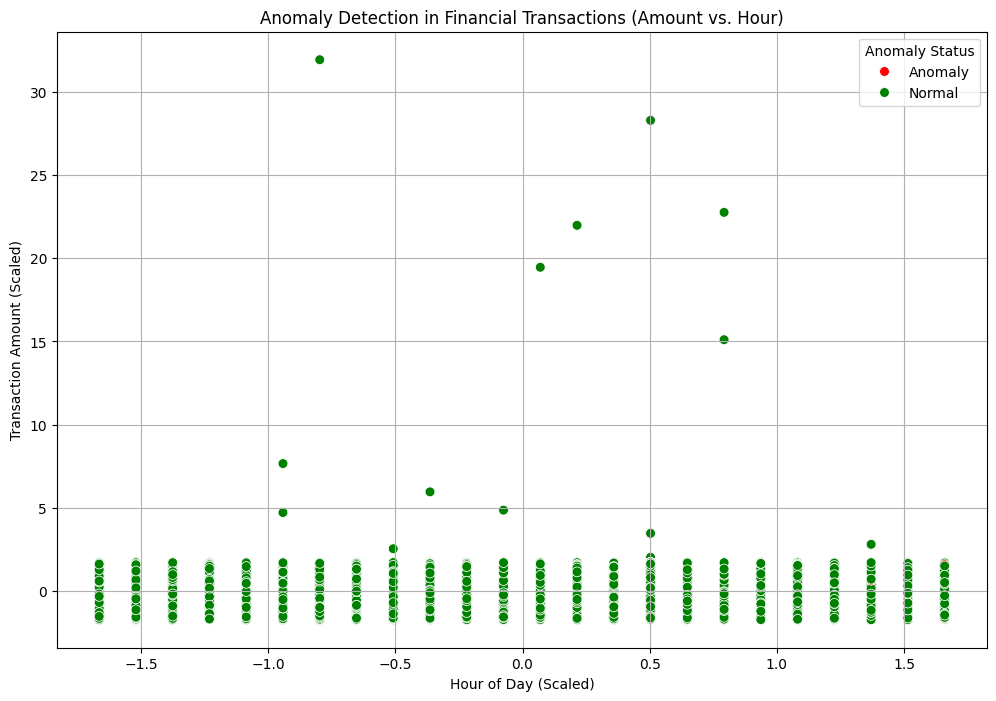

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Hour',
    y='Amount',
    hue='anomaly_label',
    data=df,
    palette={1: 'green', -1: 'red'},
    markers={1: 'o', -1: 'X'},
    s=50, # size of the markers
    legend='full'
)

# Customize the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
# Map the numerical labels (1, -1) to descriptive strings ('Normal', 'Anomaly')
new_labels = ['Normal' if int(label) == 1 else 'Anomaly' for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Anomaly Status')

plt.title('Anomaly Detection in Financial Transactions (Amount vs. Hour)')
plt.xlabel('Hour of Day (Scaled)')
plt.ylabel('Transaction Amount (Scaled)')
plt.grid(True)
plt.show()

In [10]:
anomalies_df = df[df['anomaly_label'] == -1]
print("Descriptive statistics for anomalous transactions:")
display(anomalies_df[['Amount', 'Hour', 'DayOfWeek']].describe())

normal_df = df[df['anomaly_label'] == 1]
print("\nDescriptive statistics for normal transactions:")
display(normal_df[['Amount', 'Hour', 'DayOfWeek']].describe())

Descriptive statistics for anomalous transactions:


,Amount,Hour,DayOfWeek
count,2170.000000,2170.000000,2170.000000
mean,0.135766,0.130987,-0.452051
std,1.291083,1.271461,1.294322
min,-1.719776,-1.664707,-1.480320
25%,-1.301905,-1.231103,-1.480320
50%,0.517207,0.358779,-1.480320
75%,1.387509,1.370521,1.008908
max,1.714532,1.659591,1.506754



Descriptive statistics for normal transactions:


,Amount,Hour,DayOfWeek
count,214790.000000,214790.000000,214790.000000
mean,-0.001372,-0.001323,0.004567
std,0.996537,0.996799,0.995542
min,-1.721073,-1.664707,-1.480320
25%,-0.856297,-0.797499,-0.982474
50%,0.001124,0.069709,0.013217
75%,0.852239,0.792383,1.008908
max,31.921692,1.659591,1.506754


In [11]:
anomalies_df = df[df['anomaly_label'] == -1]
print("Descriptive statistics for anomalous transactions:")
display(anomalies_df[['Amount', 'Hour', 'DayOfWeek']].describe())

normal_df = df[df['anomaly_label'] == 1]
print("\nDescriptive statistics for normal transactions:")
display(normal_df[['Amount', 'Hour', 'DayOfWeek']].describe())

Descriptive statistics for anomalous transactions:


,Amount,Hour,DayOfWeek
count,2170.000000,2170.000000,2170.000000
mean,0.135766,0.130987,-0.452051
std,1.291083,1.271461,1.294322
min,-1.719776,-1.664707,-1.480320
25%,-1.301905,-1.231103,-1.480320
50%,0.517207,0.358779,-1.480320
75%,1.387509,1.370521,1.008908
max,1.714532,1.659591,1.506754



Descriptive statistics for normal transactions:


,Amount,Hour,DayOfWeek
count,214790.000000,214790.000000,214790.000000
mean,-0.001372,-0.001323,0.004567
std,0.996537,0.996799,0.995542
min,-1.721073,-1.664707,-1.480320
25%,-0.856297,-0.797499,-0.982474
50%,0.001124,0.069709,0.013217
75%,0.852239,0.792383,1.008908
max,31.921692,1.659591,1.506754


### Descriptive Statistics for Anomalies vs. Normal Transactions

First, let's compare the descriptive statistics for numerical features (Amount, Hour, DayOfWeek) for both anomalous and normal transactions. This will highlight differences in their central tendency and spread.

In [12]:
anomalies_df = df[df['anomaly_label'] == -1]
print("Descriptive statistics for anomalous transactions:")
display(anomalies_df[['Amount', 'Hour', 'DayOfWeek']].describe())

normal_df = df[df['anomaly_label'] == 1]
print("\nDescriptive statistics for normal transactions:")
display(normal_df[['Amount', 'Hour', 'DayOfWeek']].describe())

Descriptive statistics for anomalous transactions:


,Amount,Hour,DayOfWeek
count,2170.000000,2170.000000,2170.000000
mean,0.135766,0.130987,-0.452051
std,1.291083,1.271461,1.294322
min,-1.719776,-1.664707,-1.480320
25%,-1.301905,-1.231103,-1.480320
50%,0.517207,0.358779,-1.480320
75%,1.387509,1.370521,1.008908
max,1.714532,1.659591,1.506754



Descriptive statistics for normal transactions:


,Amount,Hour,DayOfWeek
count,214790.000000,214790.000000,214790.000000
mean,-0.001372,-0.001323,0.004567
std,0.996537,0.996799,0.995542
min,-1.721073,-1.664707,-1.480320
25%,-0.856297,-0.797499,-0.982474
50%,0.001124,0.069709,0.013217
75%,0.852239,0.792383,1.008908
max,31.921692,1.659591,1.506754


### Distribution of Categorical Features for Anomalies

Next, let's examine the distribution of one-hot encoded categorical features (TransactionType, Location, Merchant, AccountID) within the anomalous transactions and compare them to the overall dataset. This will reveal which categories are over-represented or under-represented in the anomalies.

In [13]:
import numpy as np

anomalies_df = df[df['anomaly_label'] == -1]

# Get columns that are boolean (one-hot encoded categorical features)
categorical_dummy_cols = df.select_dtypes(include='bool').columns.tolist()

# Calculate proportions for anomalous transactions
anomaly_proportions = anomalies_df[categorical_dummy_cols].mean().sort_values(ascending=False)
print("Proportion of each categorical feature in anomalous transactions:")
display(anomaly_proportions.head(10))

# Calculate proportions for all transactions
overall_proportions = df[categorical_dummy_cols].mean().sort_values(ascending=False)
print("\nProportion of each categorical feature in all transactions:")
display(overall_proportions.head(10))

# Identify significant differences (e.g., features with much higher proportion in anomalies)
diff_proportions = (anomaly_proportions - overall_proportions).sort_values(ascending=False)
print("\nTop 10 categorical features with the highest proportional difference in anomalies (Anomaly % - Overall %):")
display(diff_proportions.head(10))

print("\nBottom 10 categorical features with the lowest proportional difference in anomalies (Anomaly % - Overall %):")
display(diff_proportions.tail(10))

Proportion of each categorical feature in anomalous transactions:


,0
Location_San Francisco,0.464977
TransactionType_Transfer,0.458065
AccountID_ACC8,0.388018
TransactionType_Withdrawal,0.328111
Merchant_MerchantH,0.315668
Location_London,0.255760
Merchant_MerchantA,0.214747
TransactionType_Purchase,0.213825
Merchant_MerchantE,0.190783
AccountID_ACC12,0.118433



Proportion of each categorical feature in all transactions:


,0
TransactionType_Transfer,0.335513
TransactionType_Purchase,0.332942
TransactionType_Withdrawal,0.331545
Location_San Francisco,0.201019
Location_New York,0.199935
Location_London,0.199774
Location_Los Angeles,0.199737
Location_Tokyo,0.199534
Merchant_MerchantF,0.101051
Merchant_MerchantG,0.100899



Top 10 categorical features with the highest proportional difference in anomalies (Anomaly % - Overall %):


,0
AccountID_ACC8,0.321638
Location_San Francisco,0.263958
Merchant_MerchantH,0.216489
TransactionType_Transfer,0.122551
Merchant_MerchantA,0.114733
Merchant_MerchantE,0.091489
Location_London,0.055986
AccountID_ACC12,0.051965
AccountID_ACC11,0.039407
AccountID_ACC10,0.025048



Bottom 10 categorical features with the lowest proportional difference in anomalies (Anomaly % - Overall %):


,0
Merchant_MerchantG,-0.056659
AccountID_ACC6,-0.057856
AccountID_ACC2,-0.066616
Merchant_MerchantC,-0.079709
Merchant_MerchantJ,-0.079991
Merchant_MerchantI,-0.092424
Location_New York,-0.097170
Location_Los Angeles,-0.108954
Location_Tokyo,-0.113820
TransactionType_Purchase,-0.119117


### Summary of Anomaly Characteristics

After executing the above cells, I will provide a summary of the key characteristics that define the detected anomalies based on the comparisons.

## Applyig Anomaly Detection Algorithm
I apply the Isolation Forest algorithm for anomaly detection, setting the specified parameters, fit the model to the preprocessed data, predict anomaly labels, and then store and display the counts of these labels.


In [14]:
from sklearn.ensemble import IsolationForest

# Instantiate IsolationForest model with specified parameters
# n_estimators: The number of base estimators (trees) in the ensemble.
# contamination: The proportion of outliers in the data set. This is used to define the threshold for anomaly scores.
# random_state: Controls the randomness of the estimator. For reproducibility.
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
print("IsolationForest model instantiated with n_estimators=100, contamination=0.01, random_state=42.")

# Fit the IsolationForest model to the preprocessed DataFrame
model.fit(df)
print("IsolationForest model fitted to the DataFrame.")

# Predict anomaly labels (-1 for outliers, 1 for inliers)
df['anomaly_label'] = model.predict(df)
print("Anomaly labels predicted and added to 'anomaly_label' column.")

# Display the count of each anomaly label
print("\nCount of anomaly labels:")
print(df['anomaly_label'].value_counts())

IsolationForest model instantiated with n_estimators=100, contamination=0.01, random_state=42.
IsolationForest model fitted to the DataFrame.
Anomaly labels predicted and added to 'anomaly_label' column.

Count of anomaly labels:
anomaly_label
 1    214790
-1      2170
Name: count, dtype: int64


## Visualizig Anomalies
To visualize the anomalies as requested, I need to import the necessary plotting libraries, create a scatter plot of 'Amount' vs 'Hour', color the points based on the 'anomaly_label', and ensure appropriate labels and title are set for clarity.


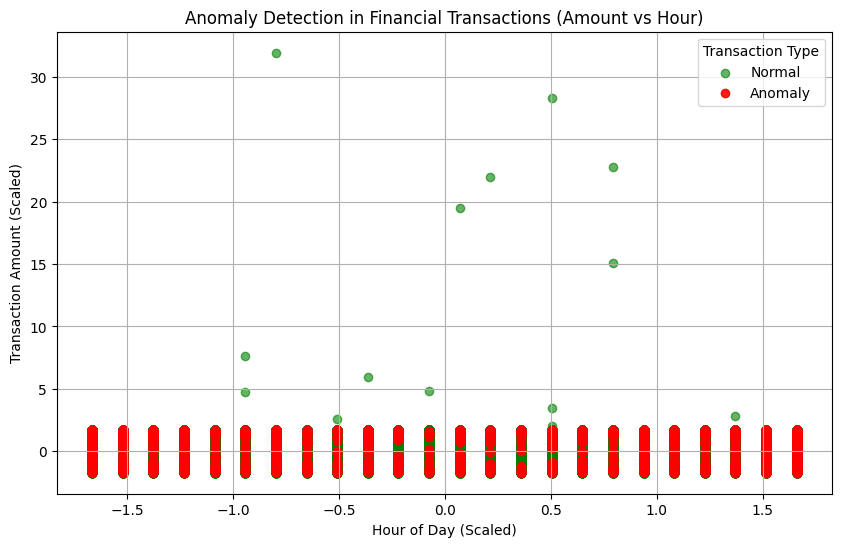

In [26]:
import matplotlib.pyplot as plt

# Separate normal and anomaly points (using already defined DataFrames)
# The variables `normal_df` and `anomalies_df` are already available from previous execution

plt.figure(figsize=(10, 6))

# Normal transactions (green)
plt.scatter(
    normal_df['Hour'],
    normal_df['Amount'],
    c='green',
    label='Normal',
    alpha=0.6
)

# Anomalous transactions (red)
plt.scatter(
    anomalies_df['Hour'],
    anomalies_df['Amount'],
    c='red',
    label='Anomaly',
    alpha=0.9
)

plt.title('Anomaly Detection in Financial Transactions (Amount vs Hour)')
plt.xlabel('Hour of Day (Scaled)')
plt.ylabel('Transaction Amount (Scaled)')
plt.legend(title='Transaction Type')
plt.grid(True)
plt.show()

## Summary:
The anomaly detection process identified 2,170 anomalous transactions.

### Data Analysis Key Findings
*   **Initial Data State:** The dataset initially contained 217,441 entries and 7 columns. Key columns included Timestamp, TransactionID, AccountID, Amount, Merchant, TransactionType, and Location.


*   **Missing Values:** 481 rows (approximately 0.22% of the initial data) had missing values and were removed, resulting in a DataFrame of 216,960 entries.
*   **Feature Engineering:**
    *   The Timestamp column was converted to datetime objects, and Hour and DayOfWeek features were extracted.
    *   Categorical features (TransactionType, Location, Merchant, AccountID) were one-hot encoded, and the TransactionID was dropped.
    *   All resulting numerical features, including the Amount and newly engineered features, were scaled using StandardScaler.

*   **Preprocessed Data:** The final preprocessed DataFrame consisted of 216,960 entries and 36 columns, ready for anomaly detection.
*   **Anomaly Detection Algorithm:** An Isolation Forest model was used with n_estimators=100 and contamination=0.01, meaning it was configured to identify approximately 1% of the data as anomalies.
*   **Anomaly Count:** The model identified 2,170 data points as anomalies (label -1) and 214,790 as normal transactions (label 1), consistent with the contamination parameter.
*   **Visualization:** A scatter plot of 'Amount' versus 'Hour' (both scaled) was used to visualize the anomalies, with normal transactions in green and anomalies in red 'X' markers, providing a clear visual distinction.

### Insights
*   The detected anomalies warrant further investigation to understand their nature.

Analyzing the specific characteristics of the 2,170 anomalous transactions (e.g., common TransactionType, Merchant, Amount ranges, Hour of day) could reveal patterns indicative of fraud or system errors.

*   The contamination parameter for Isolation Forest was set to 0.01. Experimenting with different contamination values or using other unsupervised anomaly detection algorithms (e.g., One-Class SVM, Local Outlier Factor) could be beneficial to assess the robustness and sensitivity of the anomaly detection.
